## Setup environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pydicom
!pip install tensorflow_addons

     |████████████████████████████████| 35.3MB 106kB/s 


In [3]:
import os

base_dir = '/content/drive/My Drive/'
dsb_dir = base_dir + 'dsb2018_topcoders/'
selim_dir = dsb_dir + 'selim/'

os.chdir(selim_dir)

from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import tensorflow
import tensorflow.keras.backend as K
from datasets.lidc import LIDCDatasetIterator
from models.model_factory import make_model
from losses import make_loss
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow.python.client import device_lib
from os.path import join as opjoin
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib import pyplot as plt
from models.model_factory import make_model
from datasets.lidc import imread
from os import path, mkdir, listdir
import timeit
import cv2
from tqdm import tqdm
import numpy as np
from zipfile import ZipFile
from datasets.lidc import imread, parseXML, make_mask


Using TensorFlow backend.


In [0]:
import os
base_dir = '/content/drive/My Drive/'
dsb_dir = base_dir + 'dsb2018_topcoders/'
selim_dir = dsb_dir + 'selim/'
os.chdir(dsb_dir)
!git config --global user.email "tilacyn@yandex.ru"
!git config --global user.name "Maksim Kryuchkov"
!git add '/content/drive/My Drive/dsb2018_topcoders/selim/ipynb'
!git commit -m "updated ipynb files"
!git pull

## Create index

In [0]:
os.chdir(selim_dir)
from datasets.lidc import create_index

create_index(opjoin(dsb_dir, 'data'))

0it [00:00, ?it/s]

extending with /content/drive/My Drive/dsb2018_topcoders/data/3000923-62357


2it [00:02,  1.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/3000566-03192


6it [00:53,  5.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0787/01-01-2000-53104/30821-77077


9it [02:07, 18.23s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0356/01-01-2000-62905/3000294-68066


12it [03:45, 29.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0272/01-01-2000-CHEST PA  LATERAL-72153/55842-CHEST PA  LATERAL-79631


13it [03:49, 21.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0272/01-01-2000-C-A-P-92863/6-Recon 3 C-A-P-98568


17it [04:56, 17.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0287/01-01-2000-CHEST PA  LATERAL-61217/64179-CHEST PA  LATERAL-36973


18it [05:04, 14.88s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0287/01-01-2000-CH-AB WWO-57105/6-Recon 3 CHEST-ABD-05112


22it [06:15, 14.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0351/01-01-2000-65527/3000037-32111


25it [07:04, 17.45s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0292/01-01-2000-15530/30796-05732


29it [09:50, 43.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0848/01-01-2000-CT LUNG SCREEN-42145/81792


32it [11:03, 36.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0796/01-01-2000-CT GUIDED LUNG B-69712/2-17499


35it [12:29, 35.83s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0499/01-01-2000-39717/5421-ChestRoutine  3.0  B31f-84037


38it [13:11, 26.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0224/01-01-2000-CHEST PA  LATERAL-74872/64362-CHEST PA  LATERAL-31774


39it [13:12, 19.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0224/01-01-2000-CT THORAX WCONTRAST-34842/2-CHEST-79565


43it [13:57, 13.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0509/01-01-2000-89849/5467-AbdRoutine  5.0  B31f-79828


51it [14:45,  6.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0099/01-01-2000-39142/3000989-84905


52it [14:48,  4.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0099/01-01-2000-16145/3000655-53237


56it [16:03, 10.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0192/01-01-2000-CHEST PA  LATERAL-80918/14726-CHEST PA  LATERAL-80579


57it [16:05,  7.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0192/01-01-2000-CT ANGIO CHEST NON-CO-91976/2-BOTTOM TO TOP-47734


61it [17:23, 11.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0030/01-01-2000-37865/3000576-43183


62it [18:03, 20.49s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0030/01-01-2000-08815/3000720-12443


66it [18:07, 10.45s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0941/01-01-2000-CT THORAX WO IV CONTRA-47268/32210-Recon 2 ACRIN LARGE-57753


69it [20:02, 29.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0234/01-01-2000-CT CHABPELVIS-85979/4-Recon 3 C-A-P-94709


70it [20:43, 32.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0234/01-01-2000-CHEST 2 VIEW-24225/72152-CHEST 2 VIEW-39058


74it [20:54, 17.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0404/01-01-2000-58496/30045-00951


77it [22:10, 24.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0480/01-01-2000-96977/30459-08058


80it [22:55, 21.41s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0560/01-01-2000-CT LUNG SCREEN-02875/73357


83it [23:35, 18.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0855/01-01-2000-13854/5476-ThoraxRoutine  3.0  B31f-57503


86it [24:11, 16.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0025/01-01-2000-45655/3000710-36409


87it [24:12, 12.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0025/01-01-2000-94910/3000524-53557


91it [25:42, 15.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0818/01-01-2000-CT ANGIO CHEST WWO C-68235/2-CT PE PROTOCOL BOTTOM TO TOP-85951


94it [26:38, 19.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0721/01-01-2000-CT LUNG SCREEN-37562/21260


97it [27:21, 18.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0690/01-01-2000-CT LUNG SCREEN-42147/82395


105it [28:05,  6.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0502/01-01-2000-CT LUNG SCREEN-86777/06262


111it [28:48,  6.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0229/01-01-2000-CT THORAX WO CONTRAST-80989/4-59845


112it [29:33, 18.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0229/01-01-2000-CHEST PA  LATERAL-39252/28019-87171


119it [29:37,  4.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0979/01-01-2000-22128/3000652-81401


122it [31:03, 20.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0583/01-01-2000-18747/30077-81802


128it [32:43, 15.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0020/01-01-2000-85855/3000896-59915


129it [32:46, 11.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0020/01-01-2000-29935/3000525-47372


133it [34:06, 14.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0504/01-01-2000-92373/5925-68064


136it [34:42, 14.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0335/01-01-2000-60329/30054-75212


139it [36:10, 25.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0726/01-01-2000-02449/1496-NLST TLC VOL B30F-24024


145it [38:23, 20.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0212/01-01-2000-CHEST PA  LATERAL-48057/43997-CHEST PA  LATERAL-28399


146it [38:24, 14.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0212/01-01-2000-PRE CHEST-71631/2-CHEST-71960


150it [39:05, 11.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0997/01-01-2000-96481/1491-NLST TLC VOL B30F-16103


153it [41:51, 40.48s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0466/01-01-2000-CT GUIDED LUNG B-88940/2-16689


156it [42:39, 29.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0290/01-01-2000-CHEST PA  LATERAL-27365/50640-CHEST PA  LATERAL-49816


157it [42:40, 21.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0290/01-01-2000-CT THORAX WCONTRAST-53087/2-CHEST-42176


161it [43:11, 13.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0658/01-01-2000-CT LUNG SCREEN-94591/58859


169it [44:45,  9.17s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0325/01-01-2000-1-23372/30024-81290


176it [45:56,  7.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0359/01-01-2000-51279/3096-99750


177it [46:27, 14.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0491/01-01-2000-20171/30324-97798


182it [48:35, 16.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0615/01-01-2000-CHEST-92331/30885-87176


190it [50:07,  9.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0966/01-01-2000-17978/3000280-77538


193it [50:53, 14.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0739/01-01-2000-CHEST-83097/31197-Recon 2 ACRIN LARGE-45296


196it [53:51, 44.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0798/01-01-2000-50632/5424-05549


199it [54:25, 28.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0596/01-01-2000-CT CHEST O CONTR-80891/15359


202it [55:43, 30.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0105/01-01-2000-23262/3000665-78952


203it [56:33, 36.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0105/01-01-2000-54838/3001601-76030


207it [56:37, 18.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0027/01-01-2000-45559/3000614-12456


208it [57:22, 26.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0027/01-01-2000-57764/3000930-17531


212it [57:25, 13.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0760/01-01-2000-CT THORAX WO IV CONTRA-75988/31249-HELICAL INSPIRATION-36171


215it [58:23, 18.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0159/01-01-2000-CHEST PA  LATERAL-16212/4818-CHEST PA  LATERAL-05152


216it [58:27, 14.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0159/01-01-2000-CTC-A-P-13995/3-Recon 2 C-A-P-49228


220it [59:15, 12.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0567/01-01-2000-35032/30068-49011


223it [1:00:34, 22.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0953/01-01-2000-60648/30291-84296


226it [1:02:58, 41.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0877/01-01-2000-CT LUNG SCREEN-82704/15089


229it [1:04:19, 37.17s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0209/01-01-2000-CHEST PA  LATERAL-93255/7337-94630


230it [1:04:20, 26.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0209/01-01-2000-CT CAP-23334/4-56843


234it [1:05:03, 17.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0052/01-01-2000-51420/3000625-20084


235it [1:06:49, 44.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0052/01-01-2000-87993/3001595-37316


239it [1:06:51, 21.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0269/01-01-2000-CHEST PA - LAT-77902/16892-85098


240it [1:06:52, 15.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0269/01-01-2000-CT CHEST WO CON-21224/4-46474


250it [1:08:09,  3.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0314/01-01-2000-1-82159/30026-75227


254it [1:09:12,  7.45s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0012/01-01-2000-26735/3000975-50170


257it [1:09:14,  5.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0012/01-01-2000-50667/3000561-57842


266it [1:10:06,  2.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0831/01-01-2000-89224/30830-88362


272it [1:12:46, 17.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0810/01-01-2000-82116/30307-01935


275it [1:15:01, 36.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0623/01-01-2000-CT THORAX WO IV CONTRA-35260/32127-Recon 2 ACRIN LARGE-37212


278it [1:17:31, 49.63s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0998/01-01-2000-51584/5397-ThoraxRoutine  3.0  B31s-66081


281it [1:18:06, 31.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0720/01-01-2000-22872/30064-35414


282it [1:19:12, 41.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0655/01-01-2000-36060/1326-NLST TLC VOL B30F-53512


287it [1:22:21, 33.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0570/01-01-2000-CT LUNG SCREEN-23771/13386


290it [1:22:52, 23.15s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0819/01-01-2000-CT THORAX WO IV CONTRA-50811/30922-Recon 2 LOW DOSE THROUGH LUNGS-64055


293it [1:24:36, 33.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0584/01-01-2000-CHEST-75079/30968-20907


296it [1:25:26, 26.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0337/01-01-2000-79190/3124-ThoraxRoutine  3.0  B31s-02410


299it [1:25:55, 19.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0892/01-01-2000-32452/5916-63106


302it [1:26:31, 17.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0853/01-01-2000-CT LUNG SCREEN-38192/08904


305it [1:27:08, 15.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0710/01-01-2000-CHEST-04156/31357-Recon 2 ACRIN LARGE-12286


308it [1:29:28, 37.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0895/01-01-2000-16755/30754-60826


311it [1:31:53, 48.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0249/01-01-2000-CHEST 2 VIEW-97887/56735-CHEST 2 VIEW-63175


312it [1:31:54, 34.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0249/01-01-2000-CT ANGIO CHEST NON-CO-36080/3-Recon 2 BOTTOM TO TOP-28001


316it [1:33:05, 24.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0463/01-01-2000-54542/1695-NLST TLC VOL B30F-34766


319it [1:35:03, 36.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0470/01-01-2000-CT ANGIO CHEST NON-CO-32442/2-BOTTOM TO TOP-42570


322it [1:36:04, 30.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0032/01-01-2000-19175/3000714-30382


323it [1:36:06, 22.14s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0032/01-01-2000-53482/3000537-91689


327it [1:37:35, 20.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0790/01-01-2000-CT GUIDED LUNG B-08071/2-25223


330it [1:38:44, 24.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0282/01-01-2000-CHEST PA  LATERAL-94079/49348-CHEST PA  LATERAL-13309


331it [1:38:46, 17.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0282/01-01-2000-CT THORAX WCONTRAST-94920/2-CHEST-69223


335it [1:39:14, 11.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0220/01-01-2000-CHEST PA  LATERAL-26448/36080-CHEST PA  LATERAL-58952


336it [1:39:15,  8.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0220/01-01-2000-CT ANGIO CHEST NON-CO-85747/2-BOTTOM TO TOP-31764


341it [1:40:10,  7.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0624/01-01-2000-13780/30071-98594


346it [1:41:42,  9.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0164/01-01-2000-CHEST PA  LATERAL-89652/15645-CHEST PA  LATERAL-77845


347it [1:41:44,  7.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0164/01-01-2000-PE CHEST WITH-13972/2-BOTTOM TO TOP-58588


351it [1:43:16, 13.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0260/01-01-2000-CHEST PA  LATERAL-25282/14357-CHEST PA  LATERAL-81779


352it [1:43:17,  9.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0260/01-01-2000-CT THORAX WCONTRAST-24861/2-CHEST-29286


354it [1:43:49, 11.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0858/01-01-2000-CHEST-23169/31232-Recon 2-07446


357it [1:45:50, 20.23s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0770/01-01-2000-02250/3000634-29556


362it [1:47:24, 16.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0239/01-01-2000-CHEST PA  LATERAL-61909/64330-CHEST PA  LATERAL-39804


363it [1:47:25, 12.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0239/01-01-2000-CT THORAX WO CONTRAST-05073/3-Recon 2 CHEST-62398


367it [1:48:08, 10.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0400/01-01-2000-21605/3000013-17227


370it [1:48:58, 15.45s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0876/01-01-2000-09529/30735-46446


373it [1:52:10, 48.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0918/01-01-2000-CT LUNG SCREEN-36846/68137


376it [1:52:42, 30.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0769/01-01-2000-CT LUNG SCREEN-78623/96592


379it [1:53:49, 28.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0654/01-01-2000-CT LUNG SCREEN-34461/90787


382it [1:55:13, 31.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0643/01-01-2000-CT LUNG SCREEN-21068/46497


385it [1:55:54, 24.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0468/01-01-2000-36933/5753-ThorRoutine  2.0  B70f-97516


388it [1:57:12, 28.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0601/01-01-2000-68889/30047-56685


391it [1:58:51, 34.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0199/01-01-2000-CHEST PA  LATERAL-15705/27332-CHEST PA  LATERAL-64545


392it [1:58:53, 24.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0199/01-01-2000-CT ANGIO CHEST NON-CO-58461/2-BOTTOM TO TOP-21075


396it [2:00:05, 19.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0957/01-01-2000-82159/5434-CAP  5.0  B30s-51463


399it [2:00:26, 14.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0681/01-01-2000-CHEST-06344/31346-Recon 2 ACRIN LARGE-62196


405it [2:03:22, 21.79s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0910/01-01-2000-92226/5917-19813


408it [2:03:58, 18.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0994/01-01-2000-CHEST-55074/31319-Recon 2 ACRIN LARGE-71547


411it [2:06:55, 46.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0214/01-01-2000-CHEST PA  LATERAL-31675/47567-CHEST PA  LATERAL-55419


412it [2:06:57, 32.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0214/01-01-2000-CT THORAX WCONTRAST-57061/2-CHEST-47718


416it [2:07:30, 19.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0417/01-01-2000-CT LUNG SCREEN-38390/52296


419it [2:07:58, 15.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0678/01-01-2000-72850/3000016-10450


422it [2:08:55, 19.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0775/01-01-2000-31845/3000664-65478


425it [2:10:35, 30.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0694/01-01-2000-CT LUNG SCREEN-20852/02051


428it [2:11:20, 24.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0319/01-01-2000-73210/3000030-74565


431it [2:12:10, 22.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0056/01-01-2000-28488/3000712-13937


432it [2:12:12, 16.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0056/01-01-2000-35375/3000535-98069


436it [2:13:38, 16.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0424/01-01-2000-76209/3000682-83763


439it [2:14:55, 24.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0813/01-01-2000-11692/3000055-95208


442it [2:15:36, 20.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0638/01-01-2000-CHEST-98976/31045-35878


445it [2:16:23, 19.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0382/01-01-2000-20206/5918-55654


448it [2:16:46, 14.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0276/01-01-2000-CHEST PA  LATERAL-13562/48701-CHEST PA  LATERAL-65089


449it [2:16:47, 10.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0276/01-01-2000-CT THORAX WCONTRAST-90708/3-Recon 2 CHEST-65305


453it [2:17:18,  8.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0254/01-01-2000-CHEST PA  LATERAL-32537/39857-CHEST PA  LATERAL-50212


454it [2:17:20,  6.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0254/01-01-2000-CT CAP-78690/4-Recon 3 C-A-P-74084


458it [2:17:44,  5.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0916/01-01-2000-CT LUNG SCREEN-89609/13546


461it [2:18:20, 10.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0185/01-01-2000-CHEST 2 VIEW-95009/59000-CHEST 2 VIEW-21882


462it [2:18:24,  8.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0185/01-01-2000-CT-CHAP LIVER-18057/8-Recon 2 CHEST  BLADDER-11210


466it [2:19:10,  8.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0288/01-01-2000-CHEST PA  LATERAL-08984/3028-CHEST PA  LATERAL-14469


467it [2:19:12,  6.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0288/01-01-2000-CT ANGIO CHEST WWO C-47845/2-BOTTOM TO TOP-54574


471it [2:20:15,  9.94s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0801/01-01-2000-79607/1545-NLST TLC VOL B30F-43476


474it [2:21:56, 26.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0241/01-01-2000-CHEST PA - LAT-23143/24959-98534


475it [2:21:57, 18.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0241/01-01-2000-CT CHEST WO CON-12798/4-15280


490it [2:23:35,  4.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0219/01-01-2000-CHEST PA  LATERAL-55820/3186-74714


491it [2:23:36,  3.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0219/01-01-2000-CT THORAX WCONTRAST-22683/4-22205


495it [2:24:06,  4.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0330/01-01-2000-CT LUNG SCREEN-47628/68984


498it [2:24:30,  7.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0598/01-01-2000-70111/3000015-69356


501it [2:25:31, 16.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0293/01-01-2000-CHEST-43101/31356-Recon 2 ACRIN SMALL-59979


509it [2:27:29, 11.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0897/01-01-2000-CHEST-60348/31373-Recon 2 ACRIN LARGE-93219


512it [2:29:44, 33.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0522/01-01-2000-10470/30014-77035


515it [2:30:52, 30.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0388/01-01-2000-03425/3000685-50679


518it [2:32:17, 32.94s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0551/01-01-2000-54069/30749-88562


521it [2:34:18, 41.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0733/01-01-2000-00016/1555-NLST TLC VOL B30F-85969


524it [2:36:47, 51.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0385/01-01-2000-CHEST-52204/30956-Recon 2 LOW DOSE THROUGH LUNGS-09785


532it [2:38:34, 16.68s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0614/01-01-2000-CHEST-89167/30983-Recon 2 LOW DOSE THROUGH LUNGS-18641


535it [2:41:56, 50.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0746/01-01-2000-CHEST-84209/32139-61095


538it [2:42:36, 33.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0616/01-01-2000-CT LUNG SCREEN-58233/52904


541it [2:43:23, 26.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0049/01-01-2000-29746/3001598-66982


542it [2:43:32, 20.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0049/01-01-2000-35347/3000627-75427


546it [2:44:24, 15.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0116/01-01-2000-34322/3000700-19196


547it [2:45:19, 27.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0116/01-01-2000-92107/3001577-17640


551it [2:45:24, 13.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0753/01-01-2000-82641/3000018-44574


554it [2:46:23, 19.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0959/01-01-2000-CT LUNG SCREEN-74030/44696


557it [2:47:23, 22.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0729/01-01-2000-30297/3000680-03237


563it [2:48:52, 14.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0605/01-01-2000-CHEST-48523/31058-59047


566it [2:49:50, 19.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0532/01-01-2000-24665/3000679-90027


569it [2:51:09, 26.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0397/01-01-2000-CHEST-76013/31211-Recon 2 ACRIN LARGE-70818


572it [2:53:01, 36.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0967/01-01-2000-CT LUNG SCREEN-66502/60723


575it [2:53:34, 24.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0958/01-01-2000-57356/5492-ThoraxRoutine  3.0  B31s-57973


578it [2:54:17, 21.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0633/01-01-2000-CHEST-38550/32224-Recon 2-51767


581it [2:56:52, 42.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0068/01-01-2000-CHEST PA - LAT-67107/22137-CHEST PA - LAT-12560


582it [2:56:53, 30.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0068/01-01-2000-CT CHEST W CONT-80168/4-Recon 3 CT CHEST-26125


586it [2:58:20, 24.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0537/01-01-2000-70531/30797-80824


589it [3:00:32, 39.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0324/01-01-2000-27861/3000000-89413


592it [3:01:35, 32.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0002/01-01-2000-26851/3000972-22902


593it [3:01:37, 23.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0002/01-01-2000-98329/3000522-04919


605it [3:03:23,  5.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0963/01-01-2000-1-69037/30772-67558


609it [3:05:22, 15.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0015/01-01-2000-11146/3000610-28223


610it [3:06:35, 32.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0015/01-01-2000-11353/3000927-19268


617it [3:06:40,  8.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0193/01-01-2000-CHEST PA  LATERAL-75111/7247-CHEST PA  LATERAL-84000


618it [3:06:44,  7.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0193/01-01-2000-CT THORAX WCONTRAST-69121/3-Recon 2 CHEST-94040


622it [3:07:23,  7.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0992/01-01-2000-38329/3000666-34991


625it [3:08:07, 12.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0437/01-01-2000-CHEST-35088/31028-Recon 2 ACRIN LARGE-13632


628it [3:10:16, 33.41s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0365/01-01-2000-20069/5409-79144


629it [3:10:36, 29.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0365/01-01-2000-84139/3175-ThoraxRoutine  3.0  B31f-74616


633it [3:11:01, 16.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0891/01-01-2000-CT LUNG SCREEN-02045/25649


636it [3:11:34, 15.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0368/01-01-2000-98197/5445-45926


642it [3:12:02,  6.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0189/01-01-2000-CHEST PA  LATERAL-81135/2808-Chest-39002


643it [3:12:04,  5.49s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0189/01-01-2000-CT CA-16202/6-Recon 3 CHEST-ABD-73682


647it [3:12:39,  6.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0227/01-01-2000-CHEST PA  LATERAL-30823/69088-18547


648it [3:12:40,  4.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0227/01-01-2000-CT THORAX WO CONTRAST-77370/4-60431


652it [3:13:32,  7.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0513/01-01-2000-18609/1595-NLST TLC VOL B30F-68094


655it [3:15:27, 28.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0669/01-01-2000-23004/30814-40144


659it [3:18:23, 35.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0092/01-01-2000-96337/3000774-03667


663it [3:19:42, 25.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0648/01-01-2000-56851/5927-Airway  1.0  B31f-68939


666it [3:24:12, 69.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0021/01-01-2000-39424/3000719-45434


667it [3:24:15, 49.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0021/01-01-2000-80793/3000570-02868


671it [3:25:09, 29.88s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0123/01-01-2000-90864/3000986-78955


672it [3:25:11, 21.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0123/01-01-2000-95866/3000648-68219


681it [3:26:35,  6.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0070/01-01-2000-59500/3000667-54720


682it [3:27:18, 17.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0070/01-01-2000-72718/3000990-68993


686it [3:27:22,  9.17s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0978/01-01-2000-24151/30023-44075


689it [3:29:38, 32.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0851/01-01-2000-88897/30053-32478


692it [3:31:05, 34.45s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0048/01-01-2000-24306/3000624-03732


693it [3:32:42, 53.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0048/01-01-2000-87090/3001596-38713


697it [3:32:44, 26.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0205/01-01-2000-CHEST PA  LATERAL-58237/47563-CHEST PA  LATERAL-64205


698it [3:32:45, 18.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0205/01-01-2000-CT THORAX WCONTRAST-46243/2-CHEST-78363


702it [3:33:14, 12.23s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0890/01-01-2000-CT GUIDED LUNG B-38297/2-03943


705it [3:34:02, 16.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0653/01-01-2000-CT LUNG SCREEN-12682/63325


708it [3:34:45, 17.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0874/01-01-2000-CHEST-03158/32246-Recon 2-25545


711it [3:37:27, 42.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0545/01-01-2000-CHEST-53172/31181-Recon 2 ACRIN LARGE-46863


714it [3:39:38, 48.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0038/01-01-2000-56678/3000554-82428


715it [3:40:20, 46.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0038/01-01-2000-89181/3000715-61943


719it [3:40:52, 26.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0830/01-01-2000-21602/30065-38797


722it [3:42:25, 32.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0045/01-01-2000-17703/3000547-78950


723it [3:43:11, 36.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0045/01-01-2000-58087/3001590-00766


727it [3:43:13, 18.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1009/01-01-2000-CT THORAX WCONTRAST-88101/3-Recon 2 CHEST-38044


730it [3:43:54, 17.49s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0683/01-01-2000-CT LUNG SCREEN-69732/49727


733it [3:44:46, 19.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0568/01-01-2000-CT THORAX W IV CONTRAS-87975/31261-64474


736it [3:46:05, 26.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0743/01-01-2000-49810/3000027-49911


739it [3:47:15, 27.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0221/01-01-2000-CHEST PA  LATERAL-74110/49300-CHEST PA  LATERAL-67511


740it [3:47:16, 19.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0221/01-01-2000-THORAX WITH-39271/2-CHEST-20823


744it [3:47:55, 13.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0383/01-01-2000-42739/3000687-38881


750it [3:48:31,  7.49s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0057/01-01-2000-03262/3000514-56951


751it [3:50:00, 31.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0057/01-01-2000-56292/3000895-04898


755it [3:50:03, 16.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0358/01-01-2000-84038/5924-ThorRoutine  2.0  B70f-20099


758it [3:51:33, 26.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0886/01-01-2000-07982/30036-59491


761it [3:52:03, 19.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0037/01-01-2000-43829/3000573-12179


762it [3:52:56, 29.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0037/01-01-2000-96376/3000905-16250


766it [3:52:58, 14.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0924/01-01-2000-24020/30013-88633


772it [3:54:59, 16.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0630/01-01-2000-CT LUNG SCREEN-58813/63785


775it [3:55:41, 16.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0527/01-01-2000-75447/5485-ChestRoutine  3.0  B31f-48007


778it [3:56:14, 15.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0454/01-01-2000-73374/30029-25757


781it [3:57:20, 21.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0488/01-01-2000-32704/30719-68431


784it [3:59:18, 35.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0233/01-01-2000-CHEST PA  LATERAL-44876/47057-CHEST PA  LATERAL-80837


785it [3:59:19, 25.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0233/01-01-2000-CT CHE.ABDPEL-LIVER-32011/9-Recon 3 CHEST  BLADDER-66493


789it [3:59:57, 16.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0161/01-01-2000-CHEST PA  LATERAL-60365/3482-CHEST PA  LATERAL-82028


790it [4:00:00, 12.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0161/01-01-2000-CT ANGIO CHEST WWO C-27934/2-BOTTOM TO TOP-24767


794it [4:01:31, 15.48s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0715/01-01-2000-CT THORAX W IV CONTRAS-75526/30972-135cc  4ccsec-75338


797it [4:04:00, 38.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0217/01-01-2000-CHEST PA  LATERAL-36483/55209-CHEST PA  LATERAL-94127


798it [4:04:01, 27.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0217/01-01-2000-CT CAP W-02041/4-Recon 3 C-A-P-28406


802it [4:04:34, 17.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0844/01-01-2000-27134/30825-36332


805it [4:07:18, 42.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0980/01-01-2000-26562/3152-20813


808it [4:07:51, 27.79s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0749/01-01-2000-96205/5441-ThoraxRoutine  3.0  B31s-86929


811it [4:08:24, 20.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0608/01-01-2000-27157/30022-06005


814it [4:10:00, 30.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0507/01-01-2000-84162/3000638-21986


817it [4:11:27, 32.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0460/01-01-2000-CT THORAX WO IV CONTRA-88233/32137-Recon 2 ACRIN LARGE-77950


820it [4:13:28, 41.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0635/01-01-2000-57742/5444-10043


823it [4:14:05, 28.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0135/01-01-2000-CHEST PA  LATERAL-28131/22553-CHEST PA  LATERAL-07241


824it [4:14:07, 20.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0135/01-01-2000-CT THORAX WCONTRAST-77417/3-Recon 2 C-A-P-38704


829it [4:14:57, 10.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0181/01-01-2000-CT THORAX WCONTRAST-05064/3-Recon 2 CHEST-95147


839it [4:16:01,  4.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0387/01-01-2000-65956/5486-ThoraxRoutine  3.0  B31s-08192


842it [4:16:37,  9.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0716/01-01-2000-CT LUNG SCREEN-44121/24702


845it [4:17:29, 15.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0428/01-01-2000-45824/3000686-29132


848it [4:19:00, 26.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0557/01-01-2000-65836/1854-NLST TLC VOL B30F-00950


851it [4:21:49, 48.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0433/01-01-2000-27480/30056-55739


854it [4:23:41, 47.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0898/01-01-2000-64440/30046-49169


857it [4:25:06, 40.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0318/01-01-2000-42928/1785-NLST TLC VOL B30F-26096


860it [4:27:48, 54.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0860/01-01-2000-17157/3000282-81687


863it [4:28:47, 38.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0505/01-01-2000-29496/3000011-93165


866it [4:29:46, 31.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0664/01-01-2000-62273/30765-76488


869it [4:33:12, 58.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0511/01-01-2000-CT LUNG SCREEN-33498/81056


872it [4:33:55, 37.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0661/01-01-2000-CT GUIDED LUNG B-01870/2-55058


875it [4:35:23, 37.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0043/01-01-2000-08605/3000629-31276


876it [4:36:05, 38.58s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0043/01-01-2000-41395/3000980-64282


880it [4:36:10, 19.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0518/01-01-2000-43861/5922-53685


883it [4:37:00, 19.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0712/01-01-2000-36468/3000042-34291


886it [4:38:06, 23.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0577/01-01-2000-78172/5490-ThoraxRoutine  3.0  B31s-93067


889it [4:39:02, 23.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0913/01-01-2000-97075/30020-15038


892it [4:41:33, 43.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0058/01-01-2000-10975/3001597-31510


893it [4:41:37, 31.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0058/01-01-2000-75706/3000626-00770


897it [4:42:39, 21.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0018/01-01-2000-83659/3000920-92391


898it [4:42:41, 16.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0018/01-01-2000-90263/3000550-10592


902it [4:43:40, 14.04s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0606/01-01-2000-89281/3617-NLST0.6 B30f-38609


905it [4:47:49, 59.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0169/01-01-2000-CHEST PA  LATERAL-40781/9186-CHEST PA  LATERAL-46769


906it [4:47:52, 42.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0169/01-01-2000-CT ANGIO CHEST WWO C-39204/2-BOTTOM TO TOP-93409


910it [4:49:33, 31.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0581/01-01-2000-CT LUNG SCREEN-11056/61147


913it [4:50:26, 26.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0621/01-01-2000-03312/3993-NLST0.6 B30f-95820


916it [4:55:03, 71.23s/it] 

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0792/01-01-2000-21740/30008-20739


919it [4:57:30, 65.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0727/01-01-2000-22594/30725-39027


922it [5:00:25, 68.86s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0932/01-01-2000-99550/3000288-64961


925it [5:01:45, 50.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0649/01-01-2000-CT LUNG SCREEN-00055/09630


931it [5:03:31, 23.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0370/01-01-2000-68108/30298-40645


934it [5:06:19, 46.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0029/01-01-2000-60452/3000545-94314


935it [5:08:00, 63.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0029/01-01-2000-85416/3000898-85946


940it [5:08:05, 22.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0188/01-01-2000-CHESTABDPELVIS-30124/4-Recon 2 C-A-P-84739


944it [5:08:47, 15.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0145/01-01-2000-44241/3000668-22488


945it [5:09:41, 26.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0145/01-01-2000-60671/3001603-88945


949it [5:09:45, 13.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0764/01-01-2000-CT LUNG SCREEN-05419/26904


952it [5:10:29, 15.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0110/01-01-2000-26515/3309-ThoraxRoutine  3.0  B31f-73912


957it [5:11:29, 14.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0925/01-01-2000-94111/3000675-23962


961it [5:13:34, 23.22s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0151/01-01-2000-41513/5408-86657


967it [5:14:18, 11.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0355/01-01-2000-27898/5512-ThoraxRoutine  3.0  B31s-30926


968it [5:15:02, 21.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0355/01-01-2000-41454/3190-45197


972it [5:15:44, 14.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0017/01-01-2000-50745/3000929-91923


973it [5:15:45, 10.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0017/01-01-2000-69301/3000613-28428


977it [5:17:29, 16.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0097/01-01-2000-06388/3001606-05167


978it [5:17:30, 11.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0097/01-01-2000-69162/3000738-35891


982it [5:19:09, 16.14s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0327/01-01-2000-CHEST-77213/31288-Recon 2 ACRIN LARGE-91756


985it [5:22:07, 45.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0728/01-01-2000-CT THORAX WO IV CONTRA-61238/31463-Recon 2 ACRIN LARGE-15219


988it [5:25:14, 61.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0178/01-01-2000-CHEST PA  LATERAL-59228/46677-CHEST PA  LATERAL-73420


989it [5:25:16, 43.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0178/01-01-2000-CT THORAX WCONTRAST-30822/4-Recon 3 C-A-P-77603


993it [5:26:10, 27.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0510/01-01-2000-17014/30017-21805


996it [5:27:49, 34.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0679/01-01-2000-CT LUNG SCREEN-29026/91305


999it [5:28:40, 27.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0384/01-01-2000-CHEST-72716/30918-Recon 2 ACRIN LARGE-65567


1002it [5:31:37, 50.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0588/01-01-2000-CT THORAX WCONTRAST-44257/3-90929


1005it [5:32:30, 35.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0533/01-01-2000-78329/5354-ChestRoutine  3.0  B31f-21367


1013it [5:33:15,  9.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0473/01-01-2000-CT CHEST O CONTR-56991/51777


1016it [5:35:13, 29.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0182/01-01-2000-CHEST PA  LATERAL-49353/5328-Chest-58178


1017it [5:35:14, 21.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0182/01-01-2000-CT THORAX WCONTRAST-12720/3-CHEST-35275


1021it [5:36:00, 15.14s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0210/01-01-2000-CHEST PA  LATERAL-47607/55570-CHEST PA  LATERAL-56547


1022it [5:36:02, 11.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0210/01-01-2000-POST CHEST-29270/2-CHEST-99234


1026it [5:36:51, 10.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0519/01-01-2000-CT LUNG SCREEN-39681/19413


1029it [5:38:32, 26.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1002/01-01-2000-24056/30009-40405


1035it [5:40:33, 19.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0610/01-01-2000-35454/30363-81479


1038it [5:41:32, 21.78s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0171/01-01-2000-CHEST PA  LATERAL-21699/12274-CHEST PA  LATERAL-17327


1039it [5:41:35, 16.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0171/01-01-2000-CT THORAX WCONTRAST-81232/3-Recon 2 CHEST-67131


1049it [5:42:17,  4.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0786/01-01-2000-CT LUNG SCREEN-70811/86014


1052it [5:43:02, 11.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0748/01-01-2000-CHEST-42465/31031-27970


1055it [5:43:50, 15.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0033/01-01-2000-62529/3000919-55999


1056it [5:43:52, 11.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0033/01-01-2000-87807/3000546-83490


1063it [5:44:50,  6.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0549/01-01-2000-CT LUNG SCREEN-09475/27966


1066it [5:46:29, 23.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0857/01-01-2000-46044/30757-34290


1082it [5:49:14,  3.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0235/01-01-2000-CHEST PA  LATERAL-94473/41885-CHEST PA  LATERAL-79489


1083it [5:49:16,  3.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0235/01-01-2000-CT CHEABDPEL-69281/4-Recon 3 C-A-P-42103


1087it [5:50:12,  7.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0928/01-01-2000-CT LUNG SCREEN-24035/01304


1093it [5:51:35, 10.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0155/01-01-2000-04140/3000985-04043


1094it [5:51:38,  8.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0155/01-01-2000-15811/3000645-19348


1098it [5:53:22, 15.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0991/01-01-2000-CT CHEST O CONTR-06423/07064


1101it [5:54:41, 23.79s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0889/01-01-2000-CT LUNG SCREEN-99313/91231


1104it [5:55:23, 20.58s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0459/01-01-2000-CHEST-79708/32233-88500


1107it [5:56:53, 28.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0741/01-01-2000-01595/5470-CAP  4.0  B30s-56632


1110it [5:58:46, 37.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0902/01-01-2000-CT THORAX WO IV CONTRA-88115/32242-Recon 2 ACRIN LARGE-44907


1116it [6:02:02, 30.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0711/01-01-2000-28203/2-20976


1119it [6:03:13, 29.63s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0490/01-01-2000-74089/30073-65775


1122it [6:07:11, 64.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0687/01-01-2000-CT LUNG SCREEN-51448/89532


1125it [6:08:05, 42.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0204/01-01-2000-CHEST PA  LATERAL-16279/5489-00227


1126it [6:08:09, 31.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0204/01-01-2000-CT THORAX WCONTRAST-50204/3-92139


1130it [6:09:00, 20.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0554/01-01-2000-64555/3000684-01943


1133it [6:11:01, 35.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0489/01-01-2000-POST CHEST-95362/3-75734


1136it [6:12:12, 32.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0842/01-01-2000-CT THORAX WCONTRAST-51482/3-26488


1139it [6:13:13, 28.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0820/01-01-2000-CT GUIDED LUNG BIOPSY-87163/2-51938


1142it [6:14:41, 32.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1001/01-01-2000-89347/3000026-36860


1145it [6:16:13, 35.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0163/01-01-2000-CHEST PA  LATERAL-07064/16187-CHEST PA  LATERAL-88435


1147it [6:16:17, 18.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0163/01-01-2000-CT THORAX WCONTRAST-52456/3-Recon 2 CHEST-54230


1150it [6:17:12, 20.48s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0872/01-01-2000-44991/5599-33277


1153it [6:18:12, 22.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0684/01-01-2000-42842/30834-36987


1156it [6:22:05, 60.04s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0223/01-01-2000-CHEST PA  LATERAL-44160/1-W Chest Pa Sitting-53746


1157it [6:22:08, 42.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0223/01-01-2000-CT ANGIO CHEST NON-CO-53388/2-BOTTOM TO TOP-66896


1161it [6:24:00, 32.71s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0347/01-01-2000-83846/5403-ChestRoutine  3.0  B31f-32549


1164it [6:25:00, 28.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0529/01-01-2000-79222/30366-53085


1167it [6:28:55, 63.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0152/01-01-2000-13622/3000995-12025


1168it [6:29:04, 46.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0152/01-01-2000-78489/3000696-27171


1175it [6:30:07, 16.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0487/01-01-2000-57724/4155-NLST TLC VOL B30F-21227


1178it [6:32:32, 38.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0183/01-01-2000-CHEST PA  LATERAL-01487/24566-CHEST PA  LATERAL-60243


1179it [6:32:36, 27.88s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0183/01-01-2000-CT THORAX WCONTRAST-64292/3-Recon 2 CHEST-55819


1183it [6:33:34, 19.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0999/01-01-2000-CT LUNG SCREEN-33271/89517


1186it [6:34:54, 26.49s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0175/01-01-2000-CHEST 2 VIEW-62603/33802-CHEST 2 VIEW-53413


1187it [6:34:57, 19.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0175/01-01-2000-CT THORAX WCONTRAST-99448/3-Recon 2 CHEST-06819


1191it [6:35:49, 14.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0882/01-01-2000-CT LUNG SCREEN-76115/06526


1194it [6:37:32, 28.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0829/01-01-2000-CT GUIDED LUNG B-97111/3-15391


1197it [6:39:12, 35.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0275/01-01-2000-CHEST PA  LATERAL-53776/44150-CHEST PA  LATERAL-31671


1198it [6:39:20, 27.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0275/01-01-2000-CT THORAX WCONTRAST-06987/2-CHEST-91325


1202it [6:40:17, 19.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0081/01-01-2000-04821/3000649-44726


1203it [6:41:12, 29.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0081/01-01-2000-67696/3000987-91956


1207it [6:41:18, 15.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0028/01-01-2000-60855/3000563-52671


1208it [6:42:15, 27.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0028/01-01-2000-99597/3000718-19912


1212it [6:42:18, 13.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0203/01-01-2000-CHABDPELVIS-34578/4-Recon 2 C-A-P-15124


1213it [6:43:08, 24.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0203/01-01-2000-CHEST PA  LATERAL-23584/21803-CHEST PA  LATERAL-22351


1217it [6:43:10, 12.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0019/01-01-2000-70623/3000523-06585


1218it [6:45:21, 47.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0019/01-01-2000-81072/3001066-45726


1222it [6:45:23, 23.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0945/01-01-2000-62107/5422-06513


1225it [6:46:25, 24.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0579/01-01-2000-32402/3000293-32756


1228it [6:47:36, 26.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0165/01-01-2000-CHEST PA  LATERAL-13284/17243-CHEST PA  LATERAL-61229


1229it [6:47:39, 19.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0165/01-01-2000-CT THORAX WCONTRAST-37946/2-CHEST-01585


1233it [6:48:41, 16.15s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0075/01-01-2000-14796/30083-95222


1234it [6:50:33, 44.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0075/01-01-2000-27877/30088-39049


1238it [6:50:35, 22.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0757/01-01-2000-CHEST-77222/31042-Recon 2-69212


1241it [6:53:41, 49.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0306/01-01-2000-CT LUNG SCREEN-56413/18860


1244it [6:54:27, 34.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0112/01-01-2000-30946/3001599-75345


1245it [6:54:32, 25.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0112/01-01-2000-71551/3000641-56733


1249it [6:55:21, 17.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0563/01-01-2000-16695/3000053-03514


1252it [6:56:25, 22.22s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0124/01-01-2000-CAP-93667/3-Recon 2 C-A-P-11437


1257it [6:57:13, 14.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0498/01-01-2000-CHEST-00229/30910-Recon 2 ACRIN LARGE-25349


1260it [7:00:23, 46.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0179/01-01-2000-CHEST PA  LATERAL-09065/20030-CHEST PA  LATERAL-47035


1261it [7:00:25, 33.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0179/01-01-2000-CT THORAX WCONTRAST-03675/2-CHEST-39227


1265it [7:01:13, 21.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0768/01-01-2000-26794/3000046-98326


1273it [7:02:31,  9.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1012/01-01-2000-1-CHEST-34668/32231-60224


1280it [7:03:41,  7.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0888/01-01-2000-11473/30015-35761


1283it [7:05:29, 26.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0619/01-01-2000-CT GUIDED LUNG B-79625/2-59586


1286it [7:06:58, 31.68s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0779/01-01-2000-12364/3000014-96845


1289it [7:07:58, 27.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0411/01-01-2000-84562/30732-94937


1297it [7:11:09, 18.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0806/01-01-2000-99918/30476-41021


1300it [7:14:31, 51.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0299/01-01-2000-CHEST-35732/31061-Recon 2 ACRIN LARGE-09521


1303it [7:18:21, 73.49s/it] 

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0349/01-01-2000-95376/3000007-74238


1306it [7:19:29, 50.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0072/01-01-2000-CHEST PA - LAT-09981/15478-Chest pa-43410


1307it [7:19:31, 35.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0072/01-01-2000-CT CHEST W CONT-45499/4-Recon 3-88650


1311it [7:21:36, 30.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0674/01-01-2000-30811/3000673-14021


1314it [7:24:14, 48.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0261/01-01-2000-CHEST PA  LATERAL-00730/48751-CHEST PA  LATERAL-23285


1315it [7:24:18, 34.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0261/01-01-2000-CT THORAX WCONTRAST-54976/2-CHEST-48430


1319it [7:25:23, 23.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0071/01-01-2000-CHEST PA - LAT-09626/33299-CHEST PA - LAT-48597


1320it [7:25:25, 17.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0071/01-01-2000-CT CHEST WO CON-19883/4-1.25 STANDARD-54861


1324it [7:27:16, 20.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0534/01-01-2000-89315/5473-ThoraxRoutine  3.0  B31s-95151


1330it [7:28:30, 13.14s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0543/01-01-2000-45169/30006-79830


1336it [7:31:48, 24.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0139/01-01-2000-40012/3000692-24156


1337it [7:32:39, 31.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0139/01-01-2000-87111/3001572-42076


1341it [7:32:42, 16.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0884/01-01-2000-CT LUNG SCREEN-63626/2-46335


1344it [7:34:04, 25.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0047/01-01-2000-37097/3000921-18919


1345it [7:34:08, 18.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0047/01-01-2000-68025/3000552-80992


1349it [7:35:04, 14.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0494/01-01-2000-CT LUNG SCREEN-54823/53872


1352it [7:35:56, 18.41s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0869/01-01-2000-59962/30060-92387


1355it [7:37:55, 33.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0036/01-01-2000-38467/3001610-43354


1356it [7:37:56, 24.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0036/01-01-2000-49231/3000521-18990


1360it [7:40:01, 25.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0773/01-01-2000-71746/5198-88504


1363it [7:40:45, 21.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0651/01-01-2000-00685/30041-30421


1366it [7:45:14, 66.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0986/01-01-2000-CT THORAX WCONTRAST-49344/3-64266


1369it [7:46:05, 43.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0594/01-01-2000-CT CHEST O CONTR-43117/17124


1372it [7:47:54, 44.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0208/01-01-2000-CHEST PA  LATERAL-51110/20146-85023


1373it [7:47:55, 31.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0208/01-01-2000-CT CHEST  NO IV-32740/4-60014


1377it [7:48:48, 20.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0082/01-01-2000-79176/3000701-44822


1378it [7:50:50, 51.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0082/01-01-2000-96503/3001578-15293


1382it [7:50:59, 26.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0149/01-01-2000-CHEST PA  LATERAL-22999/9569-CHEST PA  LATERAL-14586


1383it [7:51:01, 18.92s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0149/01-01-2000-CT THORAX WCONTRAST-16682/4-Recon 3 CHEST-14593


1390it [7:52:12,  9.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0236/01-01-2000-CHEST PA  LATERAL-04244/48915-CHEST PA  LATERAL-47738


1391it [7:52:14,  7.04s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0236/01-01-2000-CT THORAX WCONTRAST-06136/2-CHEST-17774


1395it [7:53:07,  9.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0780/01-01-2000-49416/30848-57827


1398it [7:56:16, 44.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0995/01-01-2000-94259/2-92711


1401it [7:57:05, 31.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0722/01-01-2000-52860/30701-22343


1404it [8:00:52, 63.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0803/01-01-2000-CT CHEST O CONTR-96534/73142


1407it [8:02:26, 50.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0506/01-01-2000-CHEST-93766/31172-49282


1410it [8:03:22, 36.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0546/01-01-2000-72276/5758-ChestRoutine  2.0  B70f-17281


1413it [8:05:43, 47.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0631/01-01-2000-69529/1465-NLST TLC VOL B30F-19639


1416it [8:08:53, 63.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0735/01-01-2000-09271/30072-76543


1419it [8:10:37, 52.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0698/01-01-2000-CT THORAX WO IV CONTRA-59895/31323-Recon 2 LOW DOSE THROUGH LUNGS-05368


1422it [8:13:38, 63.94s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0864/01-01-2000-49085/3000287-75981


1425it [8:15:08, 50.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0990/01-01-2000-76086/30042-68974


1428it [8:17:06, 49.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0582/01-01-2000-26959/1438-NLST TLC VOL B30F-66464


1431it [8:20:25, 66.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0589/01-01-2000-CT LUNG SCREEN-32018/93123


1434it [8:21:13, 42.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0808/01-01-2000-78588/3000681-46898


1437it [8:23:21, 47.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0931/01-01-2000-79380/3000010-05135


1440it [8:24:50, 42.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0265/01-01-2000-CHEST 2 VIEW-21859/8470-CHEST 2 VIEW-02203


1441it [8:24:53, 30.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0265/01-01-2000-CT THORAX WCONTRAST-23391/2-CHEST-42958


1445it [8:25:45, 20.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0114/01-01-2000-13309/3000984-57562


1446it [8:25:48, 15.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0114/01-01-2000-97315/3000644-11228


1450it [8:27:22, 17.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0663/01-01-2000-82524/30817-65421


1453it [8:30:39, 49.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0216/01-01-2000-CHEST 2 VIEW-27924/1814-17972


1454it [8:30:40, 35.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0216/01-01-2000-CT CHABDPELVIS-98419/5-47975


1458it [8:31:29, 22.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0627/01-01-2000-CT LUNG SCREEN-49469/39317


1461it [8:32:21, 21.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0695/01-01-2000-CHEST-00434/31035-95397


1464it [8:33:17, 22.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0445/01-01-2000-90209/3000656-06008


1467it [8:35:18, 36.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0376/01-01-2000-CHEST-24338/31038-Recon 2 ACRIN LARGE-65837


1470it [8:38:39, 60.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0756/01-01-2000-35476/30295-21281


1473it [8:41:43, 68.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0642/01-01-2000-64850/5750-39814


1476it [8:42:24, 41.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0128/01-01-2000-03064/3001607-19595


1477it [8:42:25, 29.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0128/01-01-2000-25676/3000740-19144


1481it [8:44:05, 25.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0353/01-01-2000-CT GUIDED LUNG B-02047/2-23235


1484it [8:45:43, 32.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0332/01-01-2000-07398/30242-57094


1485it [8:46:51, 43.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0332/01-01-2000-59207/30078-79250


1489it [8:48:37, 32.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0680/01-01-2000-CT LUNG SCREEN-63697/61436


1492it [8:49:33, 27.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0315 (1)/01-01-2000-64374/5416-26223


1493it [8:50:14, 31.72s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0315 (1)/01-01-2000-72819/5435-ThorRoutine  3.0  B31f-67044


1497it [8:51:02, 20.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0281/01-01-2000-CHEST 2 VIEW-35412/72895-CHEST 2 VIEW-57301


1498it [8:51:05, 15.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0281/01-01-2000-CT THORAX WCONTRAST-02123/6-Recon 3 C-A-P-34170


1502it [8:51:46, 11.88s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0450/01-01-2000-CT CHEST O CONTR-19747/57224


1505it [8:53:27, 26.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0226/01-01-2000-CHEST 2 VIEW-25999/72477-CHEST 2 VIEW-27183


1506it [8:53:29, 19.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0226/01-01-2000-CT CAP-58241/4-Recon 3 C-A-P-36247


1510it [8:54:11, 14.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0531/01-01-2000-CT LUNG SCREEN-21135/11064


1513it [8:54:57, 16.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1010/01-01-2000-CT ANGIO CHEST NON-CO-81361/2-BOTTOM TO TOP-17588


1516it [8:56:56, 32.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0446/01-01-2000-CT CHEST O CONTR-03519/50446


1519it [8:58:37, 37.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0409/01-01-2000-32213/30082-69037


1522it [9:00:31, 42.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0143/01-01-2000-CHEST PA  LATERAL-77155/2529-CHEST PA  LATERAL-12205


1523it [9:00:34, 30.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0143/01-01-2000-CT THORAX WCONTRAST-05745/3-Recon 2 CHEST-92345


1527it [9:01:25, 20.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0724/01-01-2000-25711/5193-00717


1530it [9:02:08, 18.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0266/01-01-2000-CHEST PA  LATERAL-69212/5434-CHEST PA  LATERAL-07115


1531it [9:02:10, 13.79s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0266/01-01-2000-CT ANGIO CHEST WWO C-79408/2-BOTTOM TO TOP-06596


1535it [9:03:40, 16.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0879/01-01-2000-18818/3000647-38633


1538it [9:05:21, 29.10s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0607/01-01-2000-04730/30082-50229


1541it [9:06:30, 28.68s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0734/01-01-2000-01616/30332-50204


1544it [9:09:33, 52.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0969/01-01-2000-CT LUNG SCREEN-46518/38194


1547it [9:11:10, 46.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0495/01-01-2000-91791/3000677-48766


1550it [9:13:27, 51.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0230/01-01-2000-CHEST PA  LATERAL-09805/64067-CHEST PA  LATERAL-04383


1551it [9:13:29, 36.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0230/01-01-2000-CT CA-55484/4-Recon 2 CHEST-ABD-67626


1555it [9:14:28, 24.14s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0493/01-01-2000-CHEST-24958/30943-48335


1558it [9:16:22, 35.72s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0304/01-01-2000-20516/3000040-28684


1561it [9:17:42, 34.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0921/01-01-2000-08679/30027-45468


1564it [9:20:22, 50.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0284/01-01-2000-CHEST PA  LATERAL-84289/16455-62795


1565it [9:20:23, 35.58s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0284/01-01-2000-CT THORAX WCONTRAST-25326/4-41371


1572it [9:21:25, 13.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0878/01-01-2000-35340/3000009-16930


1575it [9:22:46, 23.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0091/01-01-2000-CHEST 2 VIEW-13251/39464-CHEST 2 VIEW-77903


1576it [9:22:49, 17.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0091/01-01-2000-CT ANGIO CHEST WWO C-79589/2-BOTTOM TO TOP-78441


1580it [9:24:10, 17.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0414/01-01-2000-33807/5439-ThoraxRoutine  3.0  B31s-13435


1583it [9:24:54, 17.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0102/01-01-2000-59212/3000991-60907


1584it [9:24:59, 13.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0102/01-01-2000-76051/3000670-70157


1588it [9:25:53, 12.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0508/01-01-2000-44650/30076-74930


1591it [9:27:33, 27.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192


1592it [9:28:17, 32.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0001/01-01-2000-35511/3000923-62357


1596it [9:28:20, 16.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0294/01-01-2000-44453/3000019-39846


1599it [9:29:33, 23.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0732/01-01-2000-16732/3000041-15660


1602it [9:30:34, 24.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0824/01-01-2000-CT LUNG SCREEN-40544/05509


1605it [9:31:24, 22.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0883/01-01-2000-75037/5755-ChestRoutine  2.0  B70f-90986


1608it [9:33:40, 39.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0873/01-01-2000-CT LUNG SCREEN-52372/90879


1611it [9:34:22, 28.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0572/01-01-2000-CHEST-03884/31067-ACRIN LARGE-87949


1615it [9:37:02, 33.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0129/01-01-2000-CT ANGIO CHEST WWO C-30279/2-BOTTOM TO TOP-12518


1619it [9:38:46, 27.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0514/01-01-2000-87995/3000281-52230


1622it [9:39:43, 25.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0637/01-01-2000-58715/1731-NLST TLC VOL B30F-19780


1628it [9:43:22, 29.22s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0832/01-01-2000-CT LUNG SCREEN-81549/75410


1631it [9:44:06, 23.62s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0478/01-01-2000-96796/1386-NLST TLC VOL B30F-01883


1634it [9:47:35, 55.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0602/01-01-2000-30177/30048-93724


1640it [9:49:46, 27.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0034/01-01-2000-15343/3000914-23896


1641it [9:49:48, 19.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0034/01-01-2000-73045/3000516-32832


1645it [9:51:42, 21.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0420/01-01-2000-57120/3000052-09377


1648it [9:52:53, 25.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0977/01-01-2000-CT LUNG SCREEN-02638/56038


1651it [9:53:40, 22.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0392/01-01-2000-CT LUNG SCREEN-61559/09419


1654it [9:55:13, 30.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0758/01-01-2000-CHEST-58601/31201-Recon 2 ACRIN LARGE-48835


1657it [9:57:59, 49.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0373/01-01-2000-21998/30711-64515


1660it [10:00:49, 60.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0431/01-01-2000-23377/30841-59233


1663it [10:01:44, 40.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0644/01-01-2000-81205/30044-48683


1666it [10:03:29, 42.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0381/01-01-2000-83797/3000039-33813


1669it [10:04:16, 30.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0425/01-01-2000-47805/3000054-46285


1672it [10:05:28, 30.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0253/01-01-2000-CHEST 2 VIEW-15593/8454-CHEST 2 VIEW-45598


1673it [10:05:30, 21.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0253/01-01-2000-CT THORAX WCONTRAST-83454/2-CHEST-08334


1677it [10:06:30, 17.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0622/01-01-2000-63743/3000001-07488


1680it [10:07:34, 21.62s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0871/01-01-2000-CT LUNG SCREEN-55211/17534


1683it [10:09:00, 28.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0915/01-01-2000-40983/2-07285


1686it [10:10:40, 35.04s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0646/01-01-2000-92895/4223-NLST TLC VOL B30F-14604


1689it [10:13:57, 58.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0707/01-01-2000-72307/5919-72447


1692it [10:14:35, 36.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0826/01-01-2000-19915/30316-04729


1695it [10:17:47, 58.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0009/01-01-2000-07045/3000538-29210


1696it [10:19:50, 77.63s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0009/01-01-2000-83184/3000918-21926


1700it [10:19:51, 38.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0008/01-01-2000-30141/3000549-21954


1701it [10:20:44, 42.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0008/01-01-2000-46755/3001591-37639


1708it [10:20:53, 11.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0613/01-01-2000-71253/30052-55367


1718it [10:23:10,  6.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0156/01-01-2000-39422/5595-18854


1722it [10:23:54,  7.86s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0014/01-01-2000-22969/3000901-48817


1723it [10:23:56,  6.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0014/01-01-2000-38612/3000562-07402


1727it [10:24:45,  8.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0023/01-01-2000-44207/3000628-26588


1728it [10:25:48, 24.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0023/01-01-2000-54329/3000979-72506


1740it [10:25:58,  2.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0580/01-01-2000-1-15860/30811-05216


1747it [10:27:37,  5.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0815/01-01-2000-27183/30016-52948


1750it [10:29:30, 26.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0677/01-01-2000-CHEST-25551/31169-LOW DOSE THROUGH LUNGS-56859


1753it [10:30:22, 23.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0737/01-01-2000-38927/5471-15343


1756it [10:31:29, 25.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0750/01-01-2000-89670/5438-24063


1759it [10:32:11, 21.41s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0263/01-01-2000-CHEST PA  LATERAL-41598/4373-99260


1760it [10:32:12, 15.40s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0263/01-01-2000-CT CAP WCONTRAST-94478/4-94671


1764it [10:33:03, 12.94s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0186/01-01-2000-CHEST PA  LATERAL-77791/13085-CHEST PA  LATERAL-14825


1765it [10:33:05,  9.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0186/01-01-2000-CT LUNG MED PLEURA-37287/3-Recon 2 CHEST-74757


1769it [10:33:57, 10.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0952/01-01-2000-CT LUNG SCREEN-80921/12009


1772it [10:34:48, 15.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0586/01-01-2000-CT LUNG SCREEN-73021/73881


1783it [10:35:49,  4.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0632/01-01-2000-CT LUNG SCREEN-63313/28517


1786it [10:36:37, 12.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0668/01-01-2000-CT LUNG SCREEN-77041/65787


1789it [10:37:21, 15.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0302/01-01-2000-83695/30773-29296


1792it [10:40:48, 50.77s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0309/01-01-2000-48253/3000284-31537


1795it [10:42:19, 44.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0896/01-01-2000-74946/3000057-28864


1798it [10:43:14, 33.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0255/01-01-2000-CHEST PA  LATERAL-42991/53073-CHEST PA  LATERAL-39565


1799it [10:43:18, 24.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0255/01-01-2000-CT-CHAP-11331/3-Recon 2 C-A-P-94518


1803it [10:44:09, 17.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0672/01-01-2000-CHEST-44829/31265-Recon 2 ACRIN LARGE-35798


1806it [10:47:29, 50.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0904/01-01-2000-73799/5483-42621


1817it [10:48:19,  6.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0766/01-01-2000-1-05661/30030-34217


1824it [10:49:53,  7.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0593/01-01-2000-CHEST-90592/31174-02181


1827it [10:50:25, 10.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0006/01-01-2000-15339/3000974-44874


1828it [10:50:27,  7.78s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0006/01-01-2000-92500/3000556-20957


1832it [10:51:18,  9.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0074/01-01-2000-21544/3000704-44897


1833it [10:51:56, 18.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0074/01-01-2000-89413/3001581-24643


1837it [10:51:59,  9.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0451/01-01-2000-43994/3000315-48244


1840it [10:52:46, 14.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0194/01-01-2000-CHEST PA  LATERAL-86521/5192-Chest-96193


1841it [10:52:48, 10.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0194/01-01-2000-CT THORAX WCONTRAST-68838/2-CHEST-94975


1845it [10:53:44, 11.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0512/01-01-2000-CT LUNG SCREEN-99446/58572


1848it [10:54:40, 17.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0039/01-01-2000-49300/3000517-01463


1849it [10:56:32, 45.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0039/01-01-2000-73642/3000915-32229


1853it [10:56:34, 22.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0565/01-01-2000-84374/3000285-97985


1859it [10:57:33, 12.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1006/01-01-2000-49962/30038-20874


1862it [10:59:50, 34.63s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0191/01-01-2000-CHEST 2 VIEW-71969/72682-CHEST 2 VIEW-77058


1863it [10:59:52, 24.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0191/01-01-2000-CT THORAX WCONTRAST-56520/3-Recon 2 CHEST-51928


1867it [11:00:52, 18.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0440/01-01-2000-CT THORAX WO IV CONTRA-11794/32130-Recon 2 ACRIN LARGE-35012


1870it [11:03:12, 38.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0987/01-01-2000-11006/30328-25409


1873it [11:05:59, 53.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0448/01-01-2000-51374/30454-18032


1876it [11:08:32, 58.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0279/01-01-2000-CHEST 2 VIEW-44763/72764-CHEST 2 VIEW-36988


1877it [11:08:34, 41.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0279/01-01-2000-CT CAP LYMPH-06990/4-Recon 3 C-A-P-85510


1884it [11:09:12, 12.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0063/01-01-2000-09873/3000716-25884


1885it [11:09:15,  9.65s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0063/01-01-2000-51316/3000555-81128


1889it [11:10:09, 10.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0300/01-01-2000-69705/3000658-28329


1892it [11:12:02, 28.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0562/01-01-2000-32680/30040-82729


1895it [11:13:24, 31.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0667/01-01-2000-CHEST-06759/31215-Recon 2 ACRIN LARGE-21616


1898it [11:16:15, 51.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0944/01-01-2000-10455/5452-ThoraxRoutine  3.0  B31s-77835


1901it [11:17:00, 34.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0148/01-01-2000-CHEST PA  LATERAL-60353/8806-CHEST PA  LATERAL-56967


1902it [11:17:03, 25.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0148/01-01-2000-CT THORAX WCONTRAST-41427/3-Recon 2 CHEST-05032


1906it [11:17:55, 17.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0352/01-01-2000-61352/30061-18865


1909it [11:19:23, 27.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0575/01-01-2000-78878/30715-21294


1912it [11:20:54, 32.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0972/01-01-2000-95294/5447-10714


1918it [11:21:38, 12.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0484/01-01-2000-28126/5417-ChestRoutine  3.0  B31f-68211


1919it [11:22:07, 17.86s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0484/01-01-2000-71009/3100-ChestRoutine  3.0  B31f-14351


1923it [11:22:38, 11.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0740/01-01-2000-86986/3000291-03198


1926it [11:23:30, 16.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0316/01-01-2000-62570/3000047-62493


1929it [11:24:29, 20.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0083/01-01-2000-01452/3001600-28325


1930it [11:24:31, 15.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0083/01-01-2000-22049/3000646-60532


1934it [11:26:01, 16.81s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0055/01-01-2000-26492/3000908-34320


1935it [11:26:05, 13.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0055/01-01-2000-75952/3000581-39150


1939it [11:27:00, 12.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0065/01-01-2000-03808/3000536-68085


1940it [11:28:45, 40.13s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0065/01-01-2000-23346/3000713-42512


1944it [11:28:47, 19.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0313/01-01-2000-CT GUIDED LUNG B-04460/2-62930


1947it [11:29:52, 23.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0379/01-01-2000-97041/5469-16754


1950it [11:30:29, 19.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0516/01-01-2000-CT LUNG SCREEN-16499/74043


1953it [11:31:03, 16.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0157/01-01-2000-14060/3000697-12235


1954it [11:31:50, 25.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0157/01-01-2000-73651/3001576-30189


1958it [11:31:52, 12.83s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0923/01-01-2000-92779/1620-NLST TLC VOL B30F-18668


1966it [11:34:52, 15.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0938/01-01-2000-CT GUIDED LUNG B-79121/2-32320


1972it [11:35:59, 10.72s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0960/01-01-2000-83132/30287-14638


1975it [11:38:17, 34.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0125/01-01-2000-56707/3001579-36856


1976it [11:38:22, 25.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0125/01-01-2000-61676/3000702-08261


1980it [11:39:56, 22.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0026/01-01-2000-02665/3000519-40086


1981it [11:41:39, 46.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0026/01-01-2000-23686/3000916-26094


1985it [11:41:41, 22.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0173/01-01-2000-CHEST 2 VIEW-33412/1736-CHEST 2 VIEW-52505


1986it [11:41:43, 16.73s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0173/01-01-2000-CT THORAX WCONTRAST-01973/3-Recon 2 CHEST-13394


1990it [11:42:38, 13.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0700/01-01-2000-49455/30321-71594


1993it [11:45:37, 44.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0917/01-01-2000-73999/3000316-90403


1996it [11:46:48, 36.62s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0475/01-01-2000-24766/5926-69436


1999it [11:47:18, 24.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0222/01-01-2000-CAP-79315/4-Recon 3 C-A-P-45171


2000it [11:47:59, 29.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0222/01-01-2000-CHEST 2 VIEW-32119/76526-CHEST 2 VIEW-02598


2004it [11:48:01, 14.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0751/01-01-2000-21035/5410-ThoraxRoutine  3.0  B31s-50859


2007it [11:48:32, 13.66s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0441/01-01-2000-51964/4063-NLST0.6 B30f-30424


2013it [11:51:48, 24.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0968/01-01-2000-48407/3000636-64658


2016it [11:53:21, 31.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0618/01-01-2000-CT LUNG SCREEN-91452/76160


2019it [11:54:57, 35.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0542/01-01-2000-CHEST-89631/31184-Recon 2-69557


2022it [11:57:07, 44.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0870/01-01-2000-22534/3000022-26314


2025it [11:58:19, 37.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0625/01-01-2000-38584/1560-NLST TLC VOL B30F-74395


2028it [12:01:47, 61.82s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0367/01-01-2000-CT THORAX WO IV CONTRA-35645/31518-Recon 2 ACRIN LARGE-43313


2031it [12:04:04, 58.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0413/01-01-2000-05546/3000050-14231


2034it [12:04:52, 38.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0485/01-01-2000-23788/3000643-58535


2037it [12:05:54, 32.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0096/01-01-2000-17180/3001573-65662


2038it [12:05:57, 23.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0096/01-01-2000-27864/3000693-83845


2042it [12:06:47, 16.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0296/01-01-2000-22378/5453-ThoraxRoutine  3.0  B31s-64008


2045it [12:07:23, 15.78s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0394/01-01-2000-CT CHEST O CONTR-49170/47663


2048it [12:08:52, 26.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0121/01-01-2000-41529/3000776-23312


2049it [12:10:39, 50.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0121/01-01-2000-60117/3001609-11649


2053it [12:10:41, 24.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0742/01-01-2000-43529/30031-43898


2056it [12:12:32, 35.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0396/01-01-2000-61946/3160-18338


2059it [12:13:03, 23.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0258/01-01-2000-CHEST PA  LATERAL-99570/43524-CHEST PA  LATERAL-28516


2060it [12:13:05, 17.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0258/01-01-2000-CT THORAX WCONTRAST-53325/2-CHEST-23389


2067it [12:13:45,  6.73s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0060/01-01-2000-03997/3001592-27810


2068it [12:13:48,  5.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0060/01-01-2000-18382/3000575-55115


2072it [12:14:40,  8.23s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0202/01-01-2000-CHEST 2 VIEW-75112/76482-CHEST 2 VIEW-35996


2073it [12:14:41,  6.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0202/01-01-2000-CT CAP-29666/4-Recon 3 C-A-P-82679


2077it [12:15:11,  6.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0225/01-01-2000-CHEST PA  LATERAL-70825/50284-CHEST PA  LATERAL-32849


2078it [12:15:13,  4.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0225/01-01-2000-CT THORAX WO CONTRAST-79400/2-CHEST-16551


2082it [12:15:48,  6.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0763/01-01-2000-15567/30067-22785


2085it [12:17:26, 23.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0345/01-01-2000-67782/3000635-02207


2088it [12:18:45, 28.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0430/01-01-2000-CHEST-99032/31276-Recon 2 ACRIN LARGE-58431


2091it [12:20:43, 38.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0946/01-01-2000-23166/5489-ThoraxRoutine  3.0  B31s-83373


2094it [12:21:31, 28.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0894/01-01-2000-CT LUNG SCREEN-79315/20244


2097it [12:22:39, 28.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0093/01-01-2000-37140/3000688-62069


2098it [12:23:26, 33.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0093/01-01-2000-80836/3000992-48388


2105it [12:23:31,  8.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0132/01-01-2000-67346/5418-ThorRoutine  3.0  B31f-62989


2109it [12:24:20,  9.41s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0875/01-01-2000-92135/30034-78531


2112it [12:25:54, 24.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0322/01-01-2000-CT LUNG SCREEN-17799/05256


2115it [12:26:27, 18.78s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0366/01-01-2000-65129/5479-03576


2118it [12:26:57, 15.44s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0866/01-01-2000-CT CHEST O CONTR-96082/80826


2121it [12:28:19, 24.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0676/01-01-2000-36961/30341-61636


2124it [12:31:02, 46.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0046/01-01-2000-46577/3000577-66972


2125it [12:31:48, 46.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0046/01-01-2000-49088/3001593-31398


2129it [12:31:51, 23.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0547/01-01-2000-CHEST-51638/30883-08416


2132it [12:32:48, 23.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0503/01-01-2000-28519/3000029-66019


2135it [12:33:40, 22.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0900/01-01-2000-CHEST-09248/32250-Recon 2 ACRIN LARGE-76100


2138it [12:35:29, 33.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0559/01-01-2000-CT THORAX WCONTRAST-98352/3-Recon 2 CHEST-77129


2141it [12:36:05, 23.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0800/01-01-2000-CT LUNG SCREEN-70969/65145


2144it [12:36:38, 18.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0427/01-01-2000-CT THORAX WO IV CONTRA-10457/31362-Recon 2 ACRIN LARGE-77753


2147it [12:38:30, 32.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0198/01-01-2000-CHEST PA  LATERAL-92142/55761-CHEST PA  LATERAL-30928


2148it [12:38:34, 24.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0198/01-01-2000-CT THORAX WCONTRAST-08033/2-CHEST-32481


2152it [12:39:22, 16.91s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0283/01-01-2000-CAP POST-77406/3-Recon 2 C-A-P-16280


2153it [12:39:51, 20.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0283/01-01-2000-CHEST 2 VIEW-50288/9531-CHEST 2 VIEW-39444


2157it [12:39:53, 10.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0432/01-01-2000-CT CHEST-81601/31470-Recon 2 ACRIN SMALL-56742


2160it [12:41:57, 31.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0571/01-01-2000-CT LUNG SCREEN-22867/40520


2163it [12:42:31, 22.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0843/01-01-2000-50214/1460-NLST TLC VOL B30F-22764


2166it [12:45:42, 51.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0970/01-01-2000-CHEST-22947/31474-38096


2169it [12:46:33, 35.64s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0481/01-01-2000-73804/3000637-97306


2172it [12:47:39, 31.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0259/01-01-2000-CHEST PA  LATERAL-20809/23877-78787


2173it [12:47:42, 22.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0259/01-01-2000-CT THORAX WCONTRAST-90069/4-11586


2177it [12:48:26, 15.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0645/01-01-2000-CT LUNG SCREEN-53655/87713


2180it [12:49:57, 26.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0031/01-01-2000-24294/3000938-36565


2181it [12:50:01, 20.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0031/01-01-2000-70739/3000608-60568


2185it [12:51:00, 15.98s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0298/01-01-2000-11572/3000663-48288


2188it [12:52:26, 25.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0981/01-01-2000-59002/30480-87095


2191it [12:55:00, 44.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0126/01-01-2000-42927/3000982-30443


2192it [12:55:04, 32.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0126/01-01-2000-94320/3000639-58130


2196it [12:55:55, 21.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0474/01-01-2000-72976/3000045-66720


2199it [12:56:45, 21.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0652/01-01-2000-CHEST-12500/31192-ACRIN LARGE-18048


2203it [12:57:50, 16.67s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0811/01-01-2000-1-15517/30007-84692


2214it [12:59:53, 21.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0153/01-01-2000-31386/3000669-59527


2215it [13:00:45, 30.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0153/01-01-2000-61130/3001604-26119


2219it [13:00:50, 15.48s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0246/01-01-2000-CAP-87239/4-Recon 3 C-A-P-31091


2220it [13:01:26, 21.63s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0246/01-01-2000-CHEST 2 VIEW-67634/76468-CHEST 2 VIEW-49863


2222it [13:01:27, 15.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0590/01-01-2000-58320/30726-08002


2225it [13:03:44, 24.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0555/01-01-2000-CT LUNG SCREEN-71520/51579


2231it [13:04:46, 20.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0492/01-01-2000-66696/30070-26179


2240it [13:05:59, 16.58s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0410/01-01-2000-CT LUNG SCREEN-90336/46543


2243it [13:06:41, 15.78s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0257/01-01-2000-CHEST PA  LATERAL-19860/46838-CHEST PA  LATERAL-70214


2246it [13:06:42, 11.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0257/01-01-2000-CT CAP-00254/4-Recon 3 C-A-P-11671


2248it [13:07:14, 12.56s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0331/01-01-2000-CT CHEST O CONTR-79876/65150


2251it [13:08:11, 14.53s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0881/01-01-2000-CT LUNG SCREEN-01892/66345


2254it [13:08:48, 13.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0405/01-01-2000-51249/30078-51914


2257it [13:10:01, 17.02s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0201/01-01-2000-CHEST 2 VIEW-29745/1613-96652


2260it [13:10:02, 12.00s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0201/01-01-2000-CT THORAX WCONTRAST-32423/4-45994


2262it [13:10:36, 13.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0301/01-01-2000-76946/30805-01753


2265it [13:12:48, 22.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0612/01-01-2000-CT LUNG SCREEN-93403/09530


2268it [13:13:37, 20.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0807/01-01-2000-23693/1775-NLST TLC VOL B30F-11534


2271it [13:16:58, 34.61s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0346/01-01-2000-25611/5487-42952


2274it [13:17:24, 26.80s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0113/01-01-2000-43730/3001571-77826


2277it [13:17:29, 19.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0113/01-01-2000-92194/3000691-63327


2279it [13:18:21, 21.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0138/01-01-2000-CHEST PA - LAT-64404/14605-Chest pa-36775


2285it [13:18:22, 15.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0138/01-01-2000-CT CHEST W CONT-37148/102-CT CHEST 5 X 5-89059


2287it [13:19:57, 24.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0595/01-01-2000-50972/5440-89637


2290it [13:20:26, 20.22s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0007/01-01-2000-08604/3000981-87749


2293it [13:20:30, 14.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0007/01-01-2000-81781/3000631-57680


2295it [13:21:25, 18.37s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0528/01-01-2000-CT LUNG SCREEN-26958/29176


2298it [13:21:56, 16.03s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0922/01-01-2000-00552/30465-27422


2301it [13:24:19, 25.48s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0242/01-01-2000-CHEST PA  LATERAL-72694/47454-CHEST PA  LATERAL-94227


2304it [13:24:21, 18.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0242/01-01-2000-CT THORAX WCONTRAST-58962/2-CHEST-17235


2306it [13:25:03, 18.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0190/01-01-2000-CHEST PA  LATERAL-06099/10865-CHEST PA  LATERAL-33595


2309it [13:25:05, 13.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0190/01-01-2000-CT THORAX WO CONTRAST-64838/3-Recon 2 CHEST-06551


2311it [13:25:48, 15.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0207/01-01-2000-CHEST PA  LATERAL-98039/13208-CHEST PA  LATERAL-78525


2314it [13:25:49, 11.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0207/01-01-2000-CT ANGIO CHEST WWO C-68595/2-CT PE PROTOCOL BOTTOM TO TOP-90470


2316it [13:26:53, 17.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0692/01-01-2000-93069/3000032-49484


2319it [13:28:01, 18.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0840/01-01-2000-CHEST-17972/32239-ACRIN LARGE-38145


2322it [13:28:52, 18.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0905/01-01-2000-1-07760/30376-53756


2334it [13:29:52, 14.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0553/01-01-2000-CHEST-41756/32228-Recon 2 ACRIN LARGE-52285


2337it [13:31:51, 21.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0107/01-01-2000-91396/5591-44791


2340it [13:32:37, 20.07s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0515/01-01-2000-22807/3000520-50295


2345it [13:33:57, 18.84s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0964/01-01-2000-CT LUNG SCREEN-54418/86458


2348it [13:34:28, 16.21s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0626/01-01-2000-CT LUNG SCREEN-30781/14630


2351it [13:35:12, 15.76s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0077/01-01-2000-74706/3000706-80131


2354it [13:35:56, 15.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0077/01-01-2000-98371/3001583-61842


2356it [13:35:58, 11.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0797/01-01-2000-CT LUNG SCREEN-63534/61877


2359it [13:37:27, 16.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0783/01-01-2000-CT CHEST O CONTR-92469/40196


2364it [13:38:48, 13.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0927/01-01-2000-CT LUNG SCREEN-93553/32739


2367it [13:39:17, 12.87s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0395/01-01-2000-06675/5488-06380


2370it [13:39:50, 13.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0587/01-01-2000-72112/30058-61074


2373it [13:41:11, 23.58s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0934/01-01-2000-CT LUNG SCREEN-69179/75647


2374it [13:41:44, 26.27s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0558/01-01-2000-43644/30010-92603


2379it [13:43:07, 18.72s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0085/01-01-2000-59145/30089-43489


2380it [13:43:08, 13.43s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0085/01-01-2000-96172/30084-46659


2384it [13:44:57, 18.05s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0776/01-01-2000-29736/3000632-81600


2387it [13:46:50, 32.50s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0814/01-01-2000-04245/30066-74444


2390it [13:47:56, 29.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0552/01-01-2000-CT LUNG SCREEN-82803/73069


2396it [13:48:38, 12.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0108/01-01-2000-23094/3000699-84679


2397it [13:49:31, 24.29s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0108/01-01-2000-73701/3001056-24001


2401it [13:49:33, 12.16s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0909/01-01-2000-88603/30707-80403


2404it [13:52:01, 36.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0232/01-01-2000-CHEST PA  LATERAL-07236/61786-CHEST PA  LATERAL-49788


2405it [13:52:02, 26.30s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0232/01-01-2000-CT THORAX WCONTRAST-66650/3-Recon 2 CHEST-95182


2410it [13:52:41, 13.11s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0673/01-01-2000-CT THORAX WO IV CONTRA-66360/31167-Recon 2 ACRIN LARGE-53948


2415it [13:55:40, 19.01s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0003/01-01-2000-59141/3000978-59882


2416it [13:55:45, 14.79s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0003/01-01-2000-94866/3000611-03264


2420it [13:56:35, 12.46s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0317/01-01-2000-CT LUNG SCREEN-00031/56720


2423it [13:57:07, 12.86s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0268/01-01-2000-CHEST 2 VIEW-49522/72769-CHEST 2 VIEW-44907


2424it [13:57:09,  9.54s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0268/01-01-2000-CT CAP-21194/4-Recon 3 C-A-P-93813


2428it [13:57:42,  8.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0893/01-01-2000-98227/30028-64804


2431it [13:59:28, 26.25s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0146/01-01-2000-37649/3000653-67579


2432it [14:01:23, 52.94s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0146/01-01-2000-47237/3000988-18356


2436it [14:01:25, 26.19s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0482/01-01-2000-CT LUNG SCREEN-49585/82371


2442it [14:02:05, 10.83s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0243/01-01-2000-CAP-10738/4-Recon 3 C-A-P-68794


2443it [14:02:42, 18.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0243/01-01-2000-CHEST PA  LATERAL-73997/56001-CHEST PA  LATERAL-54749


2447it [14:02:43,  9.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0955/01-01-2000-CHEST-02225/31509-Recon 2 ACRIN LARGE-31524


2450it [14:05:37, 40.95s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0042/01-01-2000-33377/3000579-20341


2451it [14:06:22, 42.32s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0042/01-01-2000-73529/3000906-08135


2455it [14:06:24, 20.97s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0935/01-01-2000-30049/5413-ThorRoutine  3.0  B31f-52432


2458it [14:07:09, 19.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1005/01-01-2000-59955/3000657-15191


2461it [14:08:59, 32.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0948/01-01-2000-08186/3000003-85101


2464it [14:09:58, 28.31s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0846/01-01-2000-CT LUNG SCREEN-89507/24616


2467it [14:10:44, 23.52s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0647/01-01-2000-CHEST-44576/31501-Recon 2-45596


2470it [14:14:03, 53.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0765/01-01-2000-CT LUNG SCREEN-53705/77161


2473it [14:14:41, 34.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0162/01-01-2000-CHEST 2 VIEW-57846/65383-CHEST 2 VIEW-29940


2474it [14:14:43, 24.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0162/01-01-2000-CT THORAX WCONTRAST-56900/2-CHEST-11210


2478it [14:15:30, 16.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0024/01-01-2000-34802/3000557-80114


2483it [14:16:18, 12.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0809/01-01-2000-74122/3000295-52637


2486it [14:17:24, 20.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0320/01-01-2000-90088/3000044-20611


2489it [14:18:17, 20.96s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0354/01-01-2000-85607/5482-36928


2493it [14:18:46, 11.39s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0104/01-01-2000-16722/5597-08531


2497it [14:19:23,  9.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0744/01-01-2000-98092/3906-NLST0.6 B30f-57286


2500it [14:22:41, 46.18s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0517/01-01-2000-CT LUNG SCREEN-04221/99956


2503it [14:23:12, 29.06s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0821/01-01-2000-40989/1715-NLST TLC VOL B30F-45782


2506it [14:25:14, 39.90s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0406/01-01-2000-CHEST-67496/32142-Recon 2 LOW DOSE THROUGH LUNGS-05022


2509it [14:27:27, 47.47s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1004/01-01-2000-CHEST-11943/30946-Recon 2 LOW DOSE THROUGH LUNGS-02384


2512it [14:30:22, 59.93s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0702/01-01-2000-26923/30348-85942


2515it [14:32:42, 58.74s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0573/01-01-2000-CT LUNG SCREEN-12285/14534


2518it [14:33:13, 35.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0634/01-01-2000-42301/3000025-58100


2521it [14:34:30, 33.51s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0412/01-01-2000-79584/30049-08169


2525it [14:35:46, 22.68s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0094/01-01-2000-80662/5587-Routine Chest  2.0  B70f-24839


2529it [14:38:20, 27.35s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0777/01-01-2000-23366/3000069-24301


2532it [14:39:22, 26.38s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0804/01-01-2000-CHEST-48908/73537


2535it [14:40:06, 21.99s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0788/01-01-2000-95079/3000283-59366


2538it [14:41:11, 24.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0556/01-01-2000-43956/30079-96518


2541it [14:42:25, 27.59s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0180/01-01-2000-CHEST PA  LATERAL-16460/40284-CHEST PA  LATERAL-46219


2542it [14:42:27, 19.89s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0180/01-01-2000-CT ANGIO CHEST NON-CO-18752/2-BOTTOM TO TOP-13968


2546it [14:43:53, 18.83s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0167/01-01-2000-CHEST PA  LATERAL-27321/37875-CHEST PA  LATERAL-99977


2547it [14:43:55, 13.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0167/01-01-2000-CT THORAX WCONTRAST-39127/2-CHEST-44656


2551it [14:44:42, 11.68s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0822/01-01-2000-10934/30035-95034


2554it [14:46:49, 32.23s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0708/01-01-2000-CT THORAX WCONTRAST-59644/3-02477


2557it [14:47:33, 25.15s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0010/01-01-2000-37629/3000709-50417


2558it [14:47:35, 18.22s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0010/01-01-2000-43375/3000518-66796


2562it [14:49:24, 20.36s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0421/01-01-2000-94208/5185-27406


2565it [14:49:56, 16.60s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0885/01-01-2000-18496/3000002-50963


2571it [14:51:13, 12.57s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1007/01-01-2000-57208/3000289-88203


2574it [14:52:25, 21.24s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0951/01-01-2000-28365/30043-40576


2580it [14:54:21, 17.55s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0628/01-01-2000-CT CHEST O CONTR-89373/38785


2583it [14:56:05, 30.42s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0343/01-01-2000-CT LUNG SCREEN-57728/25883


2586it [14:56:39, 22.09s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0172/01-01-2000-CHEST 2 VIEW-02988/62455-CHEST 2 VIEW-80026


2587it [14:56:41, 16.04s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0172/01-01-2000-CT THORAX WCONTRAST-99832/2-CHEST-55114


2591it [14:57:27, 12.69s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0620/01-01-2000-CT LUNG SCREEN-20287/84591


2594it [14:58:55, 24.75s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0521/01-01-2000-16104/3000661-33473


2597it [15:00:22, 30.28s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-1003/01-01-2000-84244/3000023-44795


2603it [15:01:30, 14.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0984/01-01-2000-CT LUNG SCREEN-67378/76953


2606it [15:02:48, 23.73s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0088/01-01-2000-CHEST PA - LAT-57508/40887-CHEST PA - LAT-73368


2607it [15:02:51, 17.33s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0088/01-01-2000-CT CHABPEL WO-92527/4-Recon 3-02075


2611it [15:04:18, 17.70s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0899/01-01-2000-46991/2-94709


2614it [15:04:48, 14.85s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0536/01-01-2000-32762/30456-23059


2617it [15:06:45, 31.86s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0974/01-01-2000-78581/3000038-23884


2620it [15:07:21, 23.20s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0592/01-01-2000-CT LUNG SCREEN-53000/06047


2623it [15:08:23, 24.26s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0334/01-01-2000-51680/3226-15897


2629it [15:09:01, 10.34s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0067/01-01-2000-71158/3000708-21600


2630it [15:10:44, 38.08s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0067/01-01-2000-96244/3001615-46975


2634it [15:10:48, 19.12s/it]

extending with /content/drive/My Drive/dsb2018_topcoders/data/LIDC-IDRI-0850/01-01-2000-CT GUIDED LUNG B-94291/2-37053


## Unzip downloaded zip files

In [9]:
data_path = opjoin(dsb_dir, 'data')
sub_dirs = os.listdir(data_path)
index = 0
already_got_n = 0
for file in sub_dirs:
  if file.endswith('zip'):
    already_got = False
    for file1 in sub_dirs:
      if file1 != file and file[:-8] in file1:
        already_got = True
        break
    if already_got:
      print('already got ' + file, 'removing')
      os.remove(opjoin(data_path, file))
      already_got_n += 1
    else:
      print('not got yet ' + file) 
      print('extracting ' + file) 
      with ZipFile(opjoin(data_path, file), 'r') as zipObj:
        zipObj.extractall(opjoin(data_path, file[:-8]))

print(already_got_n)

0


## Analyze lidc ds

In [4]:
ds = LIDCDatasetIterator(os.path.join(dsb_dir, 'data'), 16, 100, (256, 256), 16)
gen = ds.train_generator()

batch = next(gen())

total training ds len: 2489
total len: 2489
train index array: 2389
val index array: 100


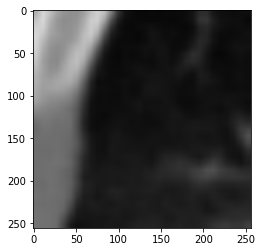

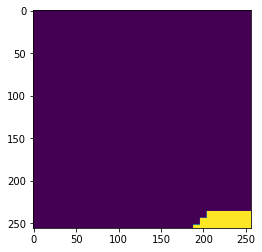

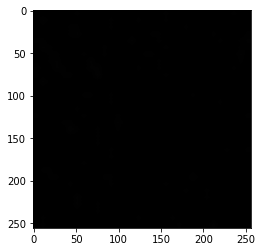

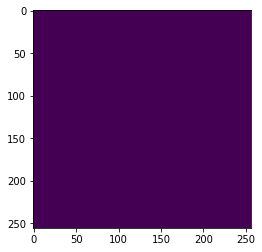

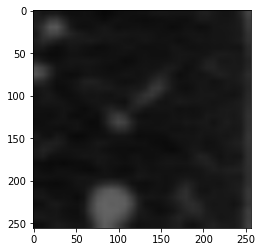

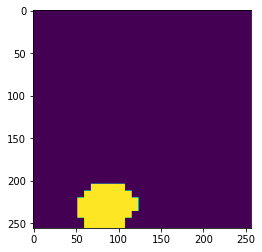

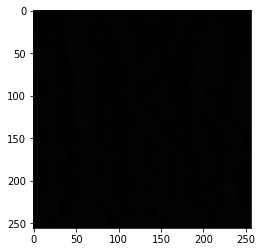

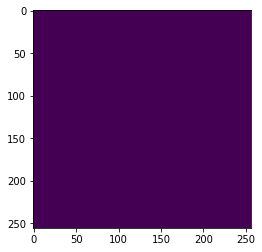

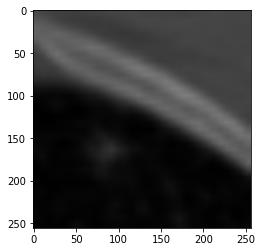

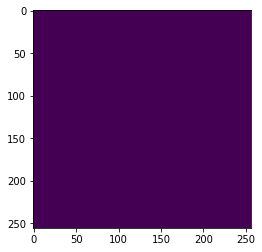

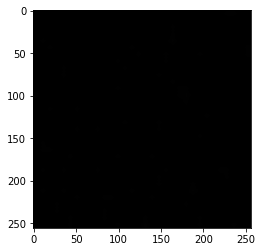

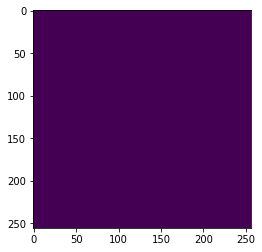

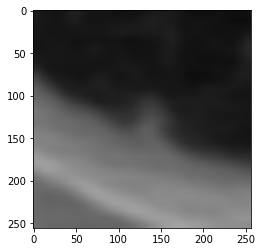

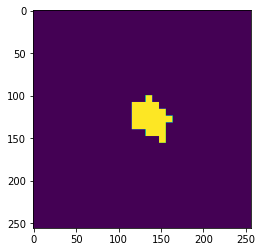

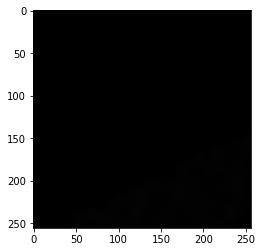

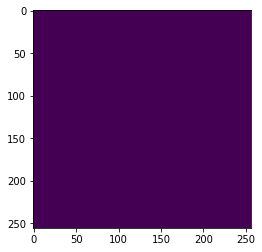

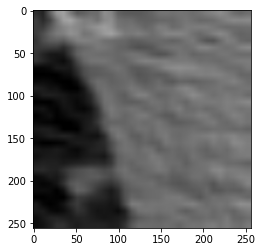

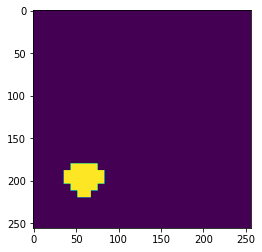

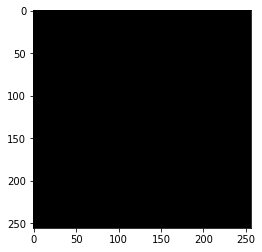

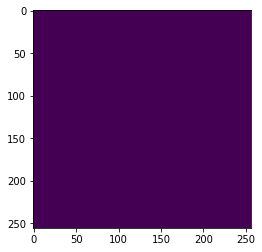

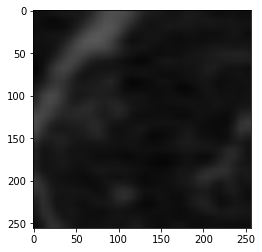

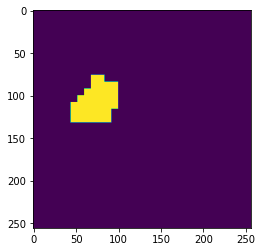

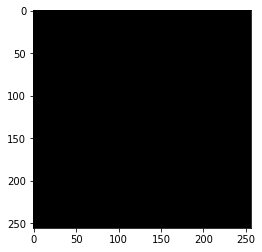

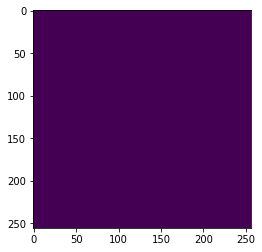

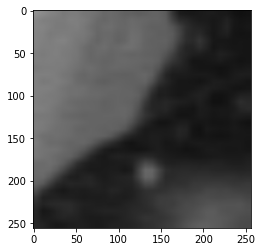

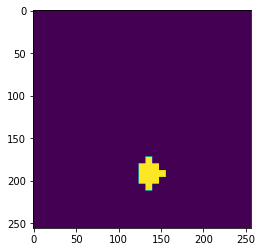

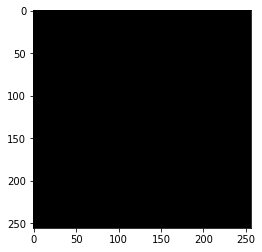

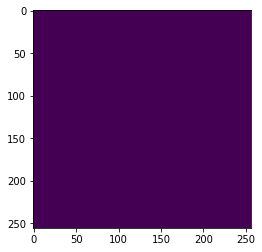

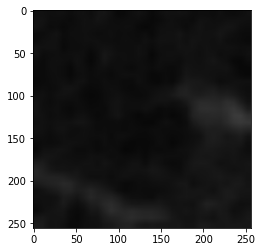

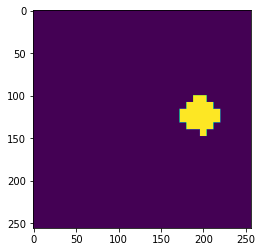

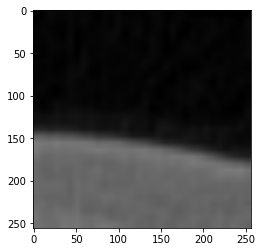

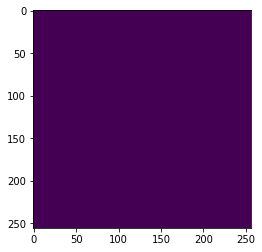

In [0]:
x, y = batch
for i in range(16):
  image = x[i]
  plt.imshow(image)
  plt.show()
  mask = np.reshape(y[i], (256, 256))
  plt.imshow(mask)
  plt.show()

## Train on mri ds

In [0]:
# !du -sh '/content/drive/My Drive/dsb2018_topcoders/mrt'
os.chdir(selim_dir)
!python train_dsb.py --gpu '0,1' --images_dir '/content/drive/My Drive/dsb2018_topcoders/selim/image' --masks_dir '/content/drive/My Drive/dsb2018_topcoders/selim/mask' --loss_function double_head_loss --network xception_fpn --epochs 10 --steps_per_epoch 100 --optimizer adam --batch_size 16

## Count different files

In [0]:
os.chdir(selim_dir)

sum = 0

mask_root_dir = opjoin(selim_dir, 'mask')

array = np.array(os.listdir(mask_root_dir))
np.random.shuffle(array)

for mask_path in array[:1000]:
  mask = cv2.imread(opjoin(mask_root_dir, mask_path))
  sum += np.count_nonzero(mask > 200) / mask.size

print(sum)

In [0]:
dcms = []
for root, folders, files in os.walk(opjoin(dsb_dir, 'data')):
    has_xml = False
    for file in files:
      if 'xml' in file:
          has_xml = True
          break
    if not has_xml:
          continue
    for file in files:
        if file.endswith('dcm'):
            # if file in files_for_training:
            dcms.append((root + '/' + file, root))

In [0]:
sum = 0

dcms = np.array(dcms)
np.random.shuffle(dcms)

for dcm in dcms[:1000]:
    image, dcm_ds = imread(dcm[0])
    nodules = parseXML(dcm[1])
    mask = make_mask(image, dcm_ds.SOPInstanceUID, nodules) * 255
    sum += np.count_nonzero(mask > 200) / mask.size
  
print(sum)

In [0]:
png_files_n = 0
non_zero_n = 0
for file in os.listdir(selim_dir):
  if not file.endswith('png'):
    continue
  
  image = cv2.imread(opjoin(selim_dir, file))
  if image.max() != 0:
    non_zero_n += 1
  # print(image.max())
  png_files_n += 1

print(non_zero_n / png_files_n)

## Set up environment in case of no colab pro

In [0]:
os.chdir(dsb_dir)

!pip install --upgrade tensorflow-gpu
!pip install --upgrade keras
!pip install imgaug lightgbm
!conda install opencv tqdm

!pip install http://download.pytorch.org/whl/cu90/torch-0.3.1-cp36-cp36m-linux_x86_64.whl
!pip install torchvision tensorboardX
!pip install pydicom
!pip install keras_resnet